In [1]:
import cv2
import matplotlib.pyplot as plt
plt.rc('font', family='NanumGothicCoding')

def read_img(path):
    img = cv2.imread(path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img, gray


def plot(img, bboxes, labels):
    img = img.copy()

    for bbox, label in zip(bboxes, labels):
        x, y, w, h = bbox
        ret = cv2.rectangle(img, (x,y), (x+w, y+h), (0, 0, 255), 3)

    plt.figure(figsize=(24, 20))
    plt.imshow(ret)

    for bbox, label in zip(bboxes, labels):
        x, y, w, h = bbox
        text_bbox = dict(boxstyle='round', alpha=0.2, facecolor='black')
        max_line = 7
        for i in range(len(label)//max_line):
            partition = (i+1)*max_line + i
            label = label[:partition] + '\n' + label[partition:]
        plt.text(x, y, label, size=8, color='white', bbox=text_bbox, weight='semibold')
        # ret = plt.text(label, (x+w//2, y+h//2), cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 0, 255), 1)
    plt.show()

In [2]:
img1 = read_img('진아1.jpg')[0]
img2 = read_img('진아2.jpg')[0]

In [3]:
# import sys
# sys.path.append('/opt/ml/project/final-project-level3-cv-12_2/yolov5')

# from modules.Human_detect import Human_detect
from modules.changeDetector import detectChange
from modules.ramen_detect import ramen_detect
from modules.classification import Classifier
from modules.outDetection import outDetector


In [4]:
change_bboxes = detectChange(img1, img2)
#1.
bbox_ramen1 = ramen_detect(img1)
bbox_ramen2 = ramen_detect(img2)

#2.
# bbox_ramen1 = ramen_detect(img1[change_bboxes])
# bbox_ramen2 = ramen_detect(img2[change_bboxes])

classifier = Classifier()
label_names1 = classifier.get_label(img1, bbox_ramen1)
label_names2 = classifier.get_label(img2, bbox_ramen2)

outdetector = outDetector()
is_out = outdetector.predict(img1, bbox_ramen1)



Fusing layers... 
Model summary: 733 layers, 140035432 parameters, 0 gradients, 208.3 GFLOPs
Fusing layers... 
Model summary: 733 layers, 140035432 parameters, 0 gradients, 208.3 GFLOPs


loading annotations into memory...
Done (t=0.01s)
creating index...
index created!
loading annotations into memory...
Done (t=0.01s)
creating index...
index created!


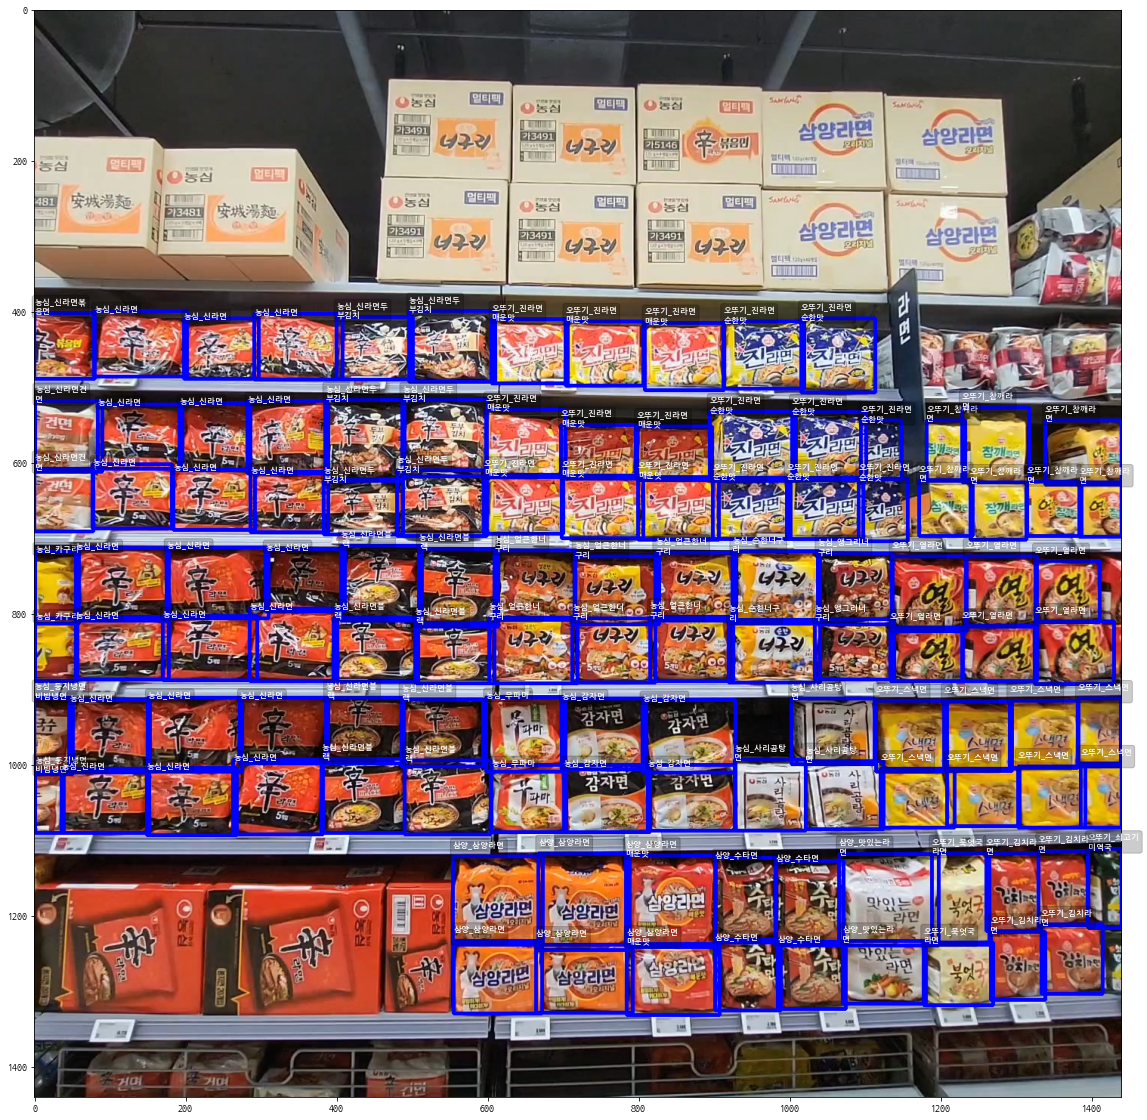

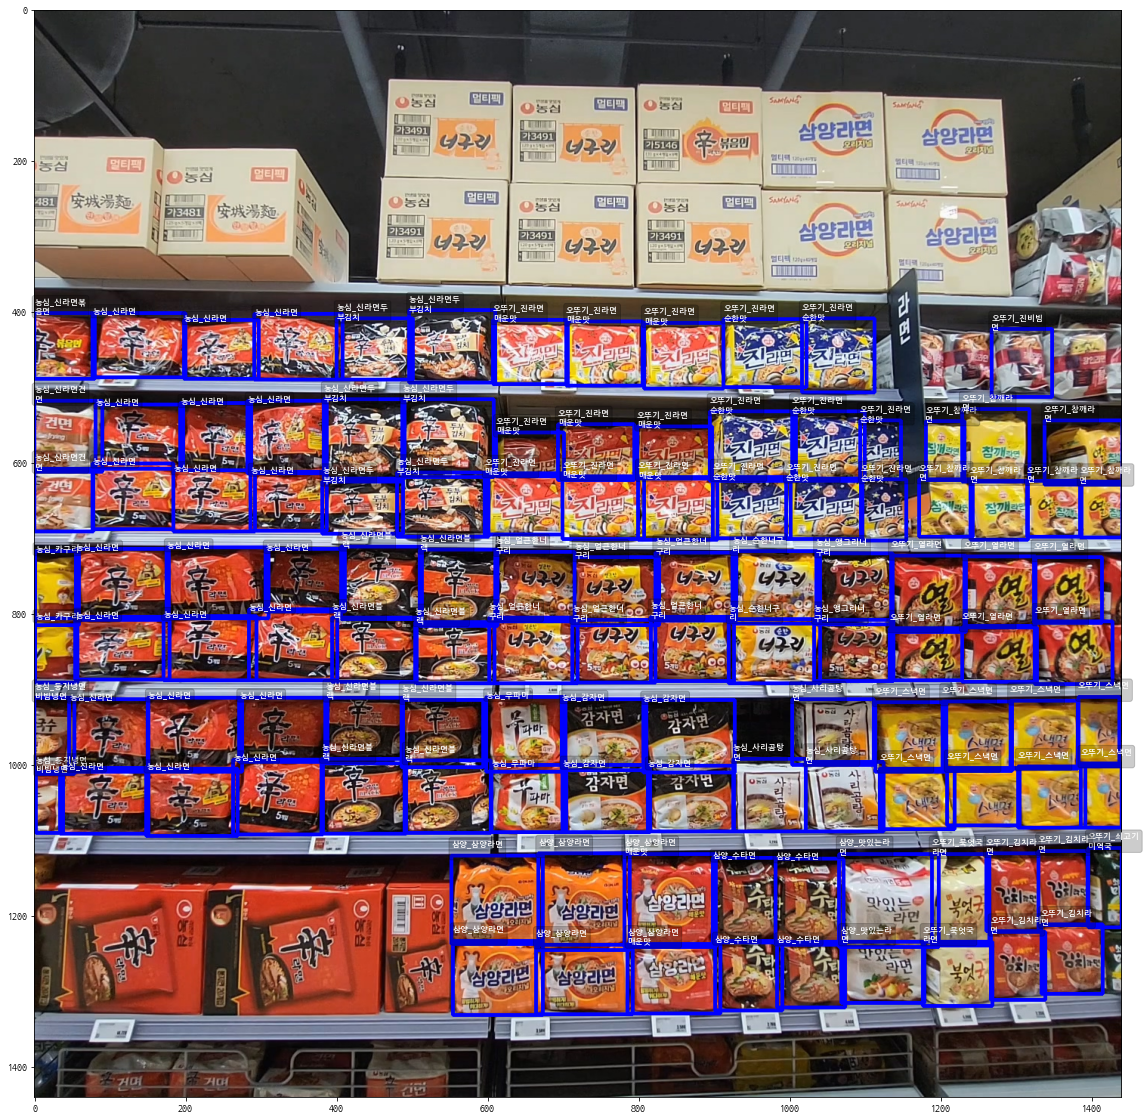

In [5]:
%matplotlib inline
plot(img1, bbox_ramen1, label_names1)
plot(img2, bbox_ramen2, label_names2)
